In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [29]:
def train_model(activation):
    model = Sequential([
        Dense(10, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, verbose=0)
    return history

In [31]:
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for act in activations:
    print(f"Training with {act} activation...")
    histories[act] = train_model(act)

Training with relu activation...


C:\Users\indum\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with sigmoid activation...
Training with tanh activation...


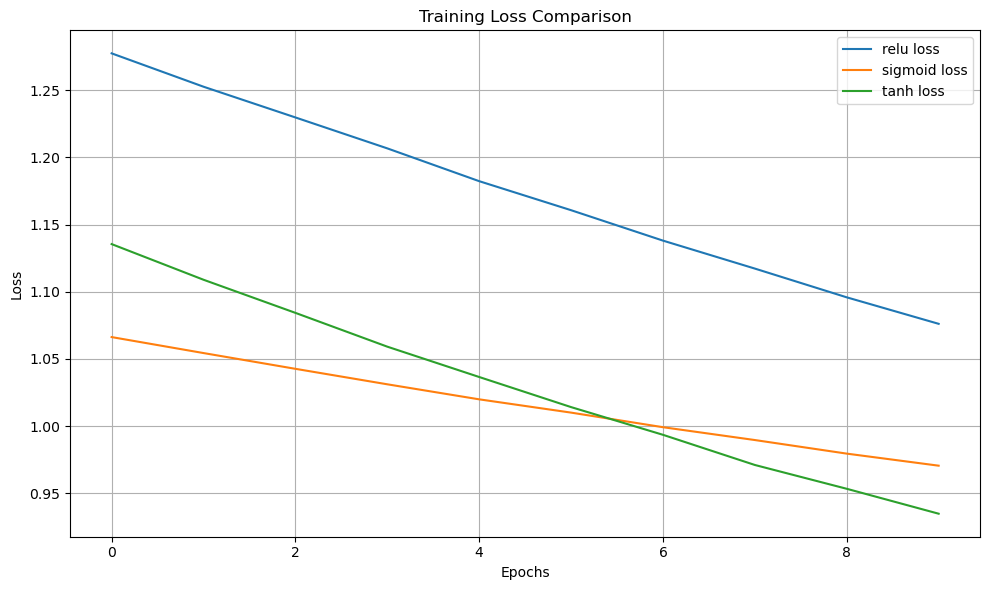

In [33]:
plt.figure(figsize=(10,6))
for act in activations:
    plt.plot(histories[act].history['loss'], label=f'{act} loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
for act in activations:
    final_loss = histories[act].history['loss'][-1]
    print(f"{act.upper()} final loss: {final_loss:.4f}")

RELU final loss: 1.0761
SIGMOID final loss: 0.9706
TANH final loss: 0.9349
